In [1]:
import pandas as  pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
class config:
    epochs = 100
    batch_size = 16
    test_batch_size = 16
    learning_rate = 1e-3
    fMRI_mask_path = '../input/trends-assessment-prediction/fMRI_mask.nii'
    root_train_path = '../input/trends-assessment-prediction/fMRI_train'
    root_test_path = '../input/trends-assessment-prediction/fMRI_test'
    num_folds = 5
    seed = 2020
    verbose = False
    verbose_step = 1
    num_workers = 4
    test_num_workers = 4
    target = ["age", "domain1_var1", "domain1_var2", "domain2_var1", "domain2_var2"]
    weight = [0.3, 0.175, 0.175, 0.175, 0.175]


In [13]:
target_id = 1
fold = 0
file_No = 0
fname = f"output/test_{config.target[target_id]}fold{fold}_No{file_No}.csv"
print(fname)

output/test_domain1_var1fold0_No0.csv


In [14]:
test_one = pd.read_csv(fname)

In [15]:
test_one.describe()

,domain1_var1
count,5877.000000
mean,52.514450
std,0.347186
min,48.515827
25%,52.298122
50%,52.533581
75%,52.741417
max,53.642956


In [6]:
df = pd.read_csv('../input/trends-assessment-prediction/train_scores.csv')
df.describe()

,Id,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
count,5877.000000,5877.000000,5439.000000,5439.000000,5838.000000,5838.000000
mean,15909.667007,50.034068,51.474692,59.244132,47.325130,51.905658
std,3411.775315,13.539881,10.188354,11.387595,11.124863,11.839203
min,10001.000000,14.257265,15.769168,1.021874,0.991172,0.815285
25%,12961.000000,40.129361,44.781240,52.396805,40.122682,44.514880
50%,15925.000000,50.427747,51.847306,60.052535,47.811205,52.572032
75%,18886.000000,59.580851,58.495576,67.142611,55.058014,59.910146
max,21754.000000,84.491113,81.325580,94.702874,82.164478,94.509903


<Figure size 576x288 with 0 Axes>

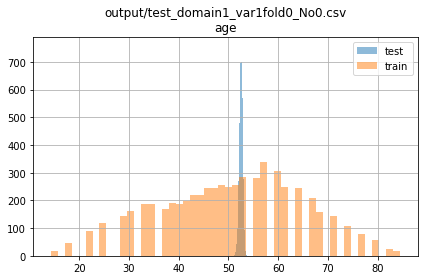

In [17]:
plt.figure(figsize=(8, 4))
test_one.hist(bins=50, alpha=0.5, label="test")
df["age"].hist(bins=50, alpha=0.5, label="train")
plt.title(fname)
plt.legend()
plt.tight_layout()
plt.savefig(f'{config.target[target_id]}.png')

In [20]:
fold = 0
file_No = 0
test_df = pd.DataFrame(np.zeros((5877, 5)), columns=config.target)
for target_id in range(5):
    fname = f"output/test_{config.target[target_id]}fold{fold}_No{file_No}.csv"
    print(fname)
    test_df[config.target[target_id]] = pd.read_csv(fname)[config.target[target_id]]
test_df

output/test_agefold0_No0.csv
output/test_domain1_var1fold0_No0.csv
output/test_domain1_var2fold0_No0.csv
output/test_domain2_var1fold0_No0.csv
output/test_domain2_var2fold0_No0.csv


,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
0,52.656132,51.944843,62.046974,49.315201,54.939621
1,53.070061,52.657017,62.987080,51.129791,54.940533
2,52.110882,52.771721,62.471466,49.703117,54.518898
3,52.647301,52.288689,62.264030,50.829178,54.840080
4,52.748692,52.241825,62.162552,49.537243,55.468372
...,...,...,...,...,...
5872,52.655926,52.949669,62.166195,49.902649,55.613770
5873,52.660671,52.615356,62.646000,50.248550,55.075527
5874,52.303154,52.448780,62.333012,48.528957,54.759441
5875,52.651775,52.288605,62.800755,49.892868,56.222759


In [22]:
list1 = os.listdir(config.root_test_path)
list2 = sorted(list1)
test_df["Id"] = list2
test_df["Id"] = test_df["Id"].map(lambda x: x[:-4])
test_df.set_index("Id", drop=True, inplace=True)
test_df

# %%
df_long = test_df.stack().reset_index()
df_long.rename(columns={'level_1': 'target', 0: 'Predicted'}, inplace=True)
df_long["Id"] = df_long["Id"] + "_" + df_long["target"]
df_long.drop("target", axis=1, inplace=True)
df_long.to_csv(f'submission/submission_No{file_No}.csv', index=False)